# Monthly timeseries of all different study area combined

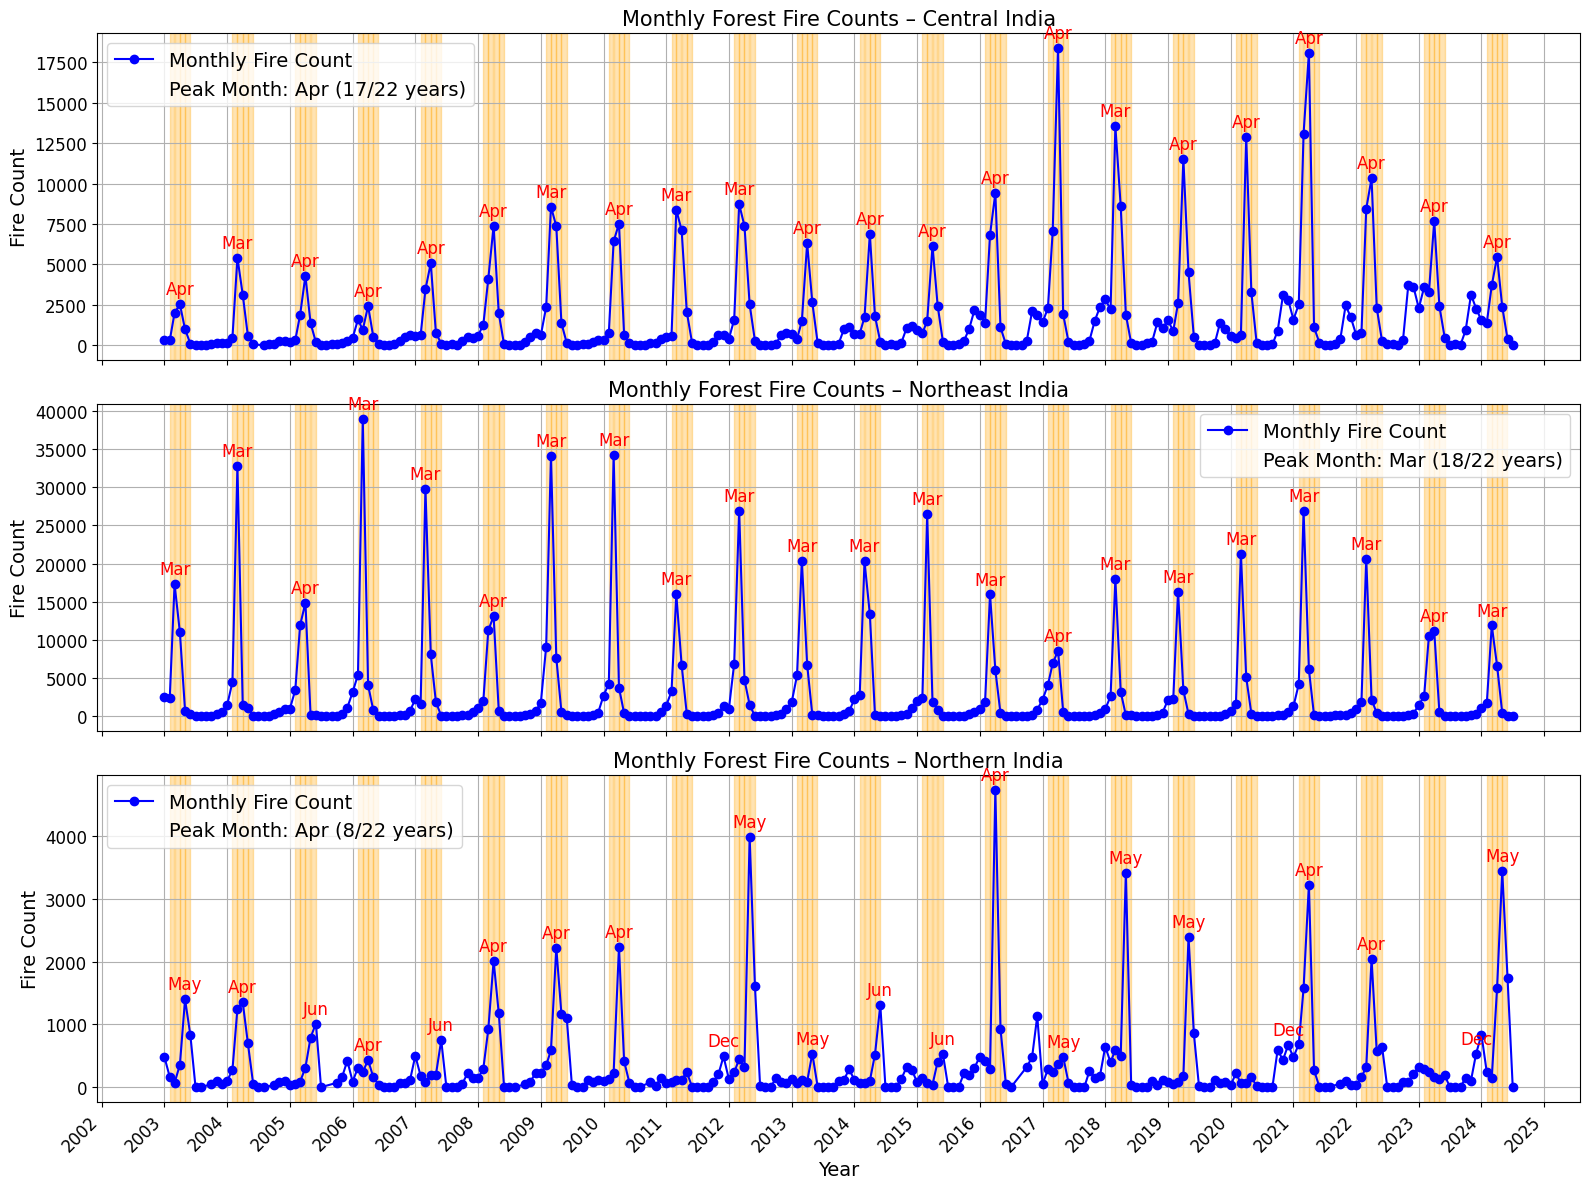

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 

# List of your CSV files. 

#######################################################################################################
#### Paths of forest fire data for different study areas produced using forest_fire_processing.ipynb ##
#######################################################################################################
file_list = [
    'center_study_area/study_area_forest_fires.csv', 
    'ne_study_area/study_area_forest_fires.csv',
    'north_study_area/study_area_forest_fires.csv'
]
titles = ['Central India', 'Northeast India', 'Northern India']

# Setup the plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharex=True)

for i, (file, ax) in enumerate(zip(file_list, axes)):
    # Load and process data
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])

    # Filter from 2003 onwards
    df = df[df['date'].dt.year >= 2003]

    df['year'] = df['date'].dt.year
    df['year_month'] = df['date'].dt.to_period('M')
    
    # Monthly total fire counts
    monthly_counts = df.groupby('year_month')['count'].sum().reset_index()
    monthly_counts['year_month'] = monthly_counts['year_month'].dt.to_timestamp()

    # Plot monthly counts
    line, = ax.plot(monthly_counts['year_month'], monthly_counts['count'], marker='o', color='blue', label='Monthly Fire Count')

    # Highlight Feb–May months
    for _, row in monthly_counts.iterrows():
        if 2 <= row['year_month'].month <= 5:
            ax.axvspan(row['year_month'], row['year_month'] + pd.offsets.MonthEnd(0), color='orange', alpha=0.3)

    # Find and label the month with highest fire count in each year
    monthly_counts['year'] = monthly_counts['year_month'].dt.year
    peak_months = monthly_counts.loc[monthly_counts.groupby('year')['count'].idxmax()]
    peak_months['month_abbr'] = peak_months['year_month'].dt.strftime('%b')

    y_offset = 0.02 * (monthly_counts['count'].max() - monthly_counts['count'].min())
    for _, row in peak_months.iterrows():
        ax.text(row['year_month'], row['count'] + y_offset, row['month_abbr'],
                color='red', fontsize=12, ha='center', va='bottom')

    # Get most frequent peak month and ratio
    most_common_month = peak_months['month_abbr'].mode()[0]
    month_count = (peak_months['month_abbr'] == most_common_month).sum()
    total_years = peak_months['year'].nunique()
    peak_legend = f'Peak Month: {most_common_month} ({month_count}/{total_years} years)'

    # Format axes
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_title(f'Monthly Forest Fire Counts – {titles[i]}', fontsize=15)
    ax.set_ylabel('Fire Count', fontsize=14)
    ax.grid(True)

    # Set tick font sizes
    ax.tick_params(axis='both', labelsize=12)

    # Add both legend entries
    if i == 1:  # For the second subplot
        ax.legend(handles=[
            line,
            plt.Line2D([], [], linestyle='None', marker='',
                       label=peak_legend)
        ], loc='upper right', fontsize=14)  # Right corner legend for the second plot
    else:
        ax.legend(handles=[
            line,
            plt.Line2D([], [], linestyle='None', marker='',
                       label=peak_legend)
        ], loc='upper left', fontsize=14)

# Common X-axis label
axes[-1].set_xlabel('Year', fontsize=14)

# Rotate x-axis ticks
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figures/monthly_time_series.png', dpi=500)
plt.show()


# Yearly timeseries of different study areas combined

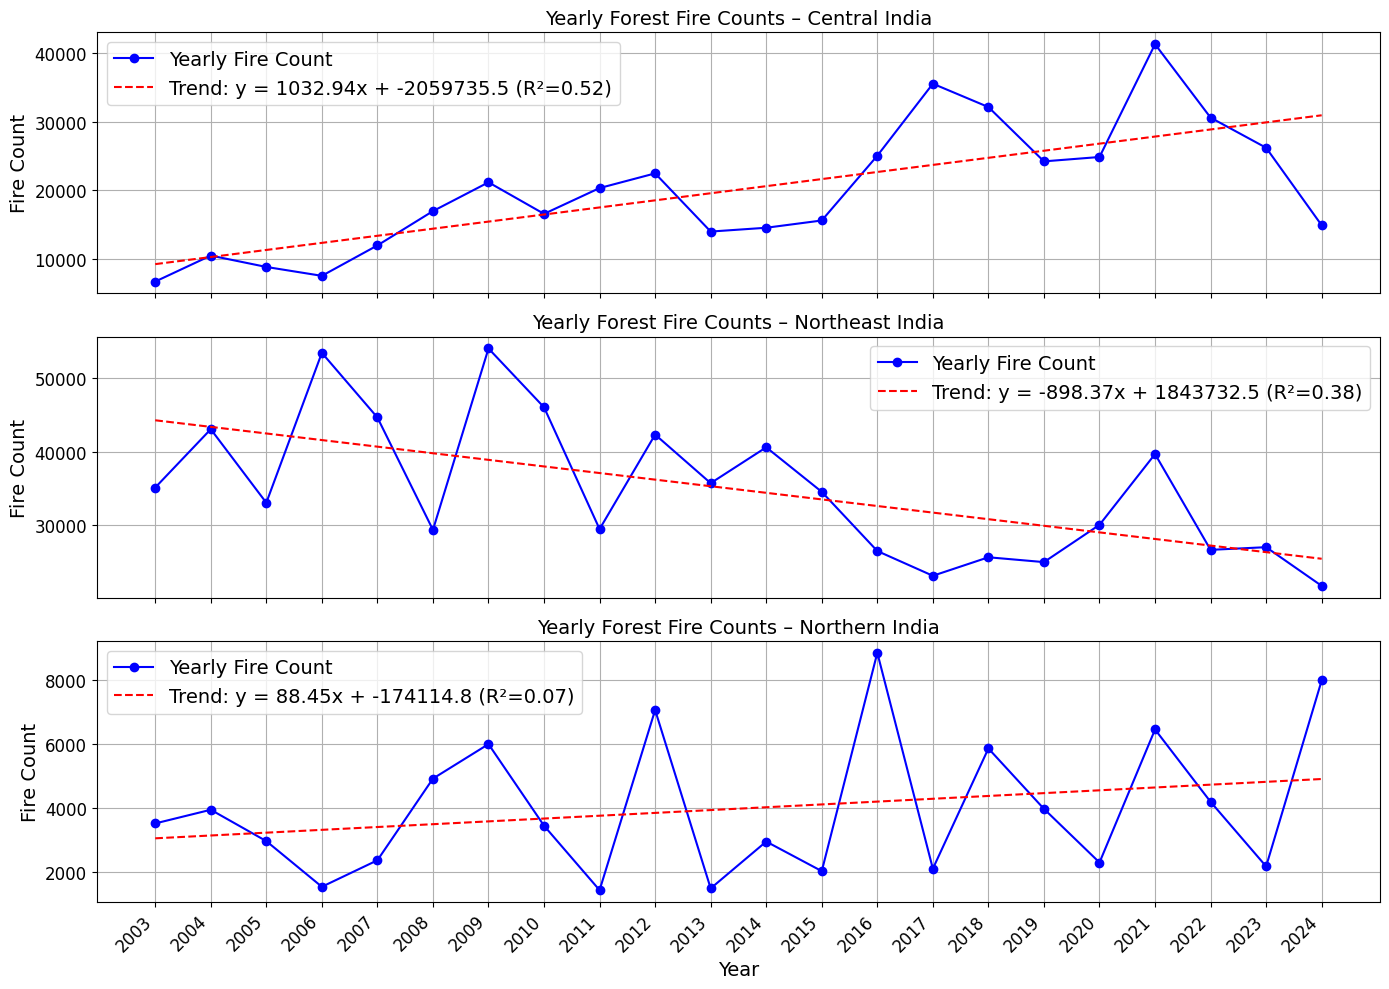

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#######################################################################################################
#### Paths of forest fire data for different study areas produced using forest_fire_processing.ipynb ##
#######################################################################################################

# File paths and titles
file_list = [
    'center_study_area/study_area_forest_fires.csv', 
    'ne_study_area/study_area_forest_fires.csv',
    'north_study_area/study_area_forest_fires.csv'
]
titles = ['Central India', 'Northeast India', 'Northern India']

# Set font size for labels and ticks
label_fontsize = 14  # Font size for labels (x, y, title)
tick_fontsize = 12   # Font size for tick labels

# Setup subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True)

for i, (file, ax) in enumerate(zip(file_list, axes)):
    # Load and process data
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

    # Filter out years 2001 and 2002
    df = df[df['year'] > 2002]

    # Group by year
    yearly_counts = df.groupby('year')['count'].sum().reset_index()

    # Linear fit
    x = yearly_counts['year']
    y = yearly_counts['count']
    coef = np.polyfit(x, y, 1)
    trend = np.poly1d(coef)
    y_pred = trend(x)

    # R² calculation
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Plot actual data and trendline
    ax.plot(x, y, marker='o', linestyle='-', color='blue', label='Yearly Fire Count')
    ax.plot(x, y_pred, color='red', linestyle='--', label=f'Trend: y = {coef[0]:.2f}x + {coef[1]:.1f} (R²={r2:.2f})')

    # Labels and style with increased fontsize
    ax.set_title(f'Yearly Forest Fire Counts – {titles[i]}', fontsize=label_fontsize)
    ax.set_ylabel('Fire Count', fontsize=label_fontsize)
    ax.grid(True)
    ax.legend(fontsize=label_fontsize)

    # Set tick parameters with increased fontsize
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # Ensure all years are shown on the x-axis
    ax.set_xticks(yearly_counts['year'])

# Shared x-axis label with increased fontsize
axes[-1].set_xlabel('Year', fontsize=label_fontsize)



# Rotate x-axis ticks for all subplots
for ax in axes:
   plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# Save the figure with high DPI
plt.savefig('figures/yearly_time_series.png', dpi=500)

plt.show()
